<a href="https://colab.research.google.com/github/santimai/ProjectBigdata/blob/master/Model_PLF_PL6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [0]:

raw_data = pd.read_csv('https://raw.githubusercontent.com/santimai/ProjectBigdata/master/PL6_Data_cleansing_raw2.csv', delimiter=',')
raw_data.head()

,Unnamed: 0,DateTime,Formula,Performance,jobID,steam,Temp_Con,current,Temp_Front_Pellet,Status,Formula2
0,1,2019-05-31,562 PIG BRD STR,12.77,40309,848.30,73.76,362.40,88.68,True,562
1,2,2019-05-31,562 PIG BRD STR,12.77,40309,862.33,73.69,364.95,88.35,True,562
2,3,2019-05-31,566S/SP6 GEST SOW (SPEC PLF only),9.12,40311,611.58,75.49,278.25,80.46,False,566
3,4,2019-05-31,566S/SP6 GEST SOW (SPEC PLF only),11.67,40311,638.78,77.81,282.90,83.97,False,566
4,5,2019-05-31,566S/SP6 GEST SOW (SPEC PLF only),11.67,40311,668.53,72.19,296.70,85.86,True,566


In [0]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 231388 entries, 0 to 231387
Data columns (total 11 columns):
Unnamed: 0           231388 non-null int64
DateTime             231388 non-null object
Formula              231388 non-null object
Performance          231388 non-null float64
jobID                231388 non-null int64
steam                231388 non-null float64
Temp_Con             231388 non-null float64
current              231388 non-null float64
Temp_Front_Pellet    231388 non-null float64
Status               231388 non-null bool
Formula2             231388 non-null int64
dtypes: bool(1), float64(5), int64(3), object(2)
memory usage: 17.9+ MB


In [0]:
x = raw_data.drop(['Unnamed: 0','DateTime',	'jobID','Status','Formula'], axis=1)
y=np.ravel(raw_data['Status'])

In [0]:
#แบบ Object
x = raw_data.drop(['Unnamed: 0','DateTime',	'jobID','Status'], axis=1)
y=np.ravel(raw_data['Status'])

In [0]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 231388 entries, 0 to 231387
Data columns (total 6 columns):
Performance          231388 non-null float64
steam                231388 non-null float64
Temp_Con             231388 non-null float64
current              231388 non-null float64
Temp_Front_Pellet    231388 non-null float64
Formula2             231388 non-null int64
dtypes: float64(5), int64(1)
memory usage: 10.6 MB


In [0]:
# Train test split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.3, random_state=50)

In [0]:
# เลือกโมเดลและวิธีการฝึก Logistic Regression
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression(penalty='l2', tol=0.001, solver='lbfgs', max_iter=500)

In [0]:
# ฝึกโมเดลด้วยข้อมูลชุดฝึก
lr_model=lr_model.fit(x_train, y_train)

In [0]:
# ทดสอบโมเดลด้วยข้อมูลชุดทดสอบ
y_predict = lr_model.predict(x_test)

In [0]:
# วัดประสิทธิภาพ
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(y_test, y_predict))

cm = np.array(confusion_matrix(y_test, y_predict, labels=[0,1]))
confusion = pd.DataFrame(cm, index=['Not Churn', 'Churn'], columns=['Predicted Not Churn', 'Predicted Churn'])
print('Confusion matrix')
confusion

              precision    recall  f1-score   support

       False       0.97      0.99      0.98     29567
        True       0.99      0.98      0.98     39850

    accuracy                           0.98     69417
   macro avg       0.98      0.98      0.98     69417
weighted avg       0.98      0.98      0.98     69417

Confusion matrix


,Predicted Not Churn,Predicted Churn
Not Churn,29188,379
Churn,979,38871


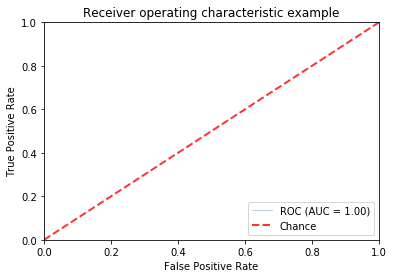

In [0]:
# Plot ROC
from sklearn import metrics
pred = lr_model.predict_proba(x_test)
fpr, tpr, thresholds = metrics.roc_curve(y_test, pred[:,1])
roc_auc = metrics.auc(fpr, tpr)


def plot_roc(fpr, tpr,roc_auc):
  plt.plot(fpr, tpr, lw=1, alpha=0.3,label='ROC (AUC = %0.2f)' % (roc_auc))
  plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
          label='Chance', alpha=.8)
  plt.legend(loc="lower right")
  plt.xlim([0, 1])
  plt.ylim([0, 1])
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title('Receiver operating characteristic example')
 # return plt

plot_roc(fpr, tpr,roc_auc)